# Perf data

In [1]:
import pandas as pd
import logging
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)



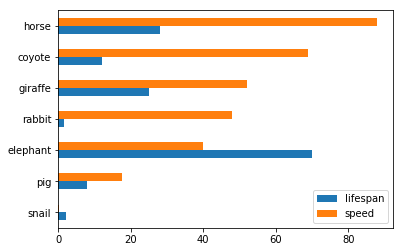

In [2]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.barh()

In [3]:
!ls

LFSR-vs-eLRU.txt	  functions.stat1  rd_lat_format.csv
LFSR-vs-eLRU_per-pkt.txt  perf_data.ipynb  test.json
functions.stat		  rd_lat.csv	   trace_stat.json


In [4]:
df = pd.read_csv('LFSR-vs-eLRU.txt', sep='\s', engine='python', names=['pct', 'lfsr_count', 'elru_count', 'evname'])
df.head()

,pct,lfsr_count,elru_count,evname
0,0.986852,7527543,7627830,branch-misses
1,0.999785,25953224122,25958805492,bus-cycles
2,0.991267,1097776620,1107448452,cache-misses
3,0.987525,22938287343,23228064617,cache-references
4,0.999792,25952497369,25957902715,cycles


In [5]:
df1=df[df['lfsr_count'] > 0]

In [6]:
df1
df2=df1.copy()

In [7]:
df2.loc[:,'pctchange']=df2[['lfsr_count', 'elru_count']].pct_change(axis=1)['elru_count']
df2

,pct,lfsr_count,elru_count,evname,pctchange
0,0.986852,7527543,7627830,branch-misses,0.013323
1,0.999785,25953224122,25958805492,bus-cycles,0.000215
2,0.991267,1097776620,1107448452,cache-misses,0.008810
3,0.987525,22938287343,23228064617,cache-references,0.012633
4,0.999792,25952497369,25957902715,cycles,0.000208
5,0.987488,54063953179,54748999759,instructions,0.012671
6,1.022556,8760729262,8567481375,stalled-cycles-backend,-0.022058
7,1.075887,105818001,98354186,stalled-cycles-frontend,-0.070534
16,0.991374,1097922513,1107475973,L1-dcache-load-misses,0.008701
17,0.987572,22942113938,23230816634,L1-dcache-loads,0.012584


In [8]:
df2['pctchangestd']=df2['pctchange'].abs()
df3=df2.sort_values(by='pctchangestd', ascending=True)
df3=df3[df3['pctchangestd'] > 0.05]
df3['pctchange'] = df3['pctchange']*100
df3=df3.reset_index(drop=True)
df3

,pct,lfsr_count,elru_count,evname,pctchange,pctchangestd
0,1.075887,105818001,98354186,stalled-cycles-frontend,-7.053445,0.070534
1,1.125000,18,16,"arm_cmn/hnf_pocq_retry,nodeid=0x48/",-11.111111,0.111111
2,0.898752,17718,19714,"arm_cmn/hnf_txrsp_stall,nodeid=0x24/",11.265380,0.112654
3,0.898226,17762613,19775218,"arm_cmn/hnf_txdat_stall,nodeid=0x24/",11.330568,0.113306
4,0.895186,6422880,7174913,"arm_cmn/hnf_txdat_stall,nodeid=0x44/",11.708657,0.117087
5,1.135362,14217,12522,"arm_cmn/hnf_brd_snoops_sent,nodeid=0x44/",-11.922346,0.119223
6,0.893148,99293,111172,"arm_cmn/hnf_pocq_addrhaz,nodeid=0x28/",11.963583,0.119636
7,1.137666,74227,65245,l1i_tlb_refill,-12.100718,0.121007
8,0.883990,16482,18645,"arm_cmn/hnf_brd_snoops_sent,nodeid=0x28/",13.123407,0.131234
9,0.881961,105173,119249,"arm_cmn/hnf_pocq_addrhaz,nodeid=0x48/",13.383663,0.133837


In [9]:
len(df3)

41

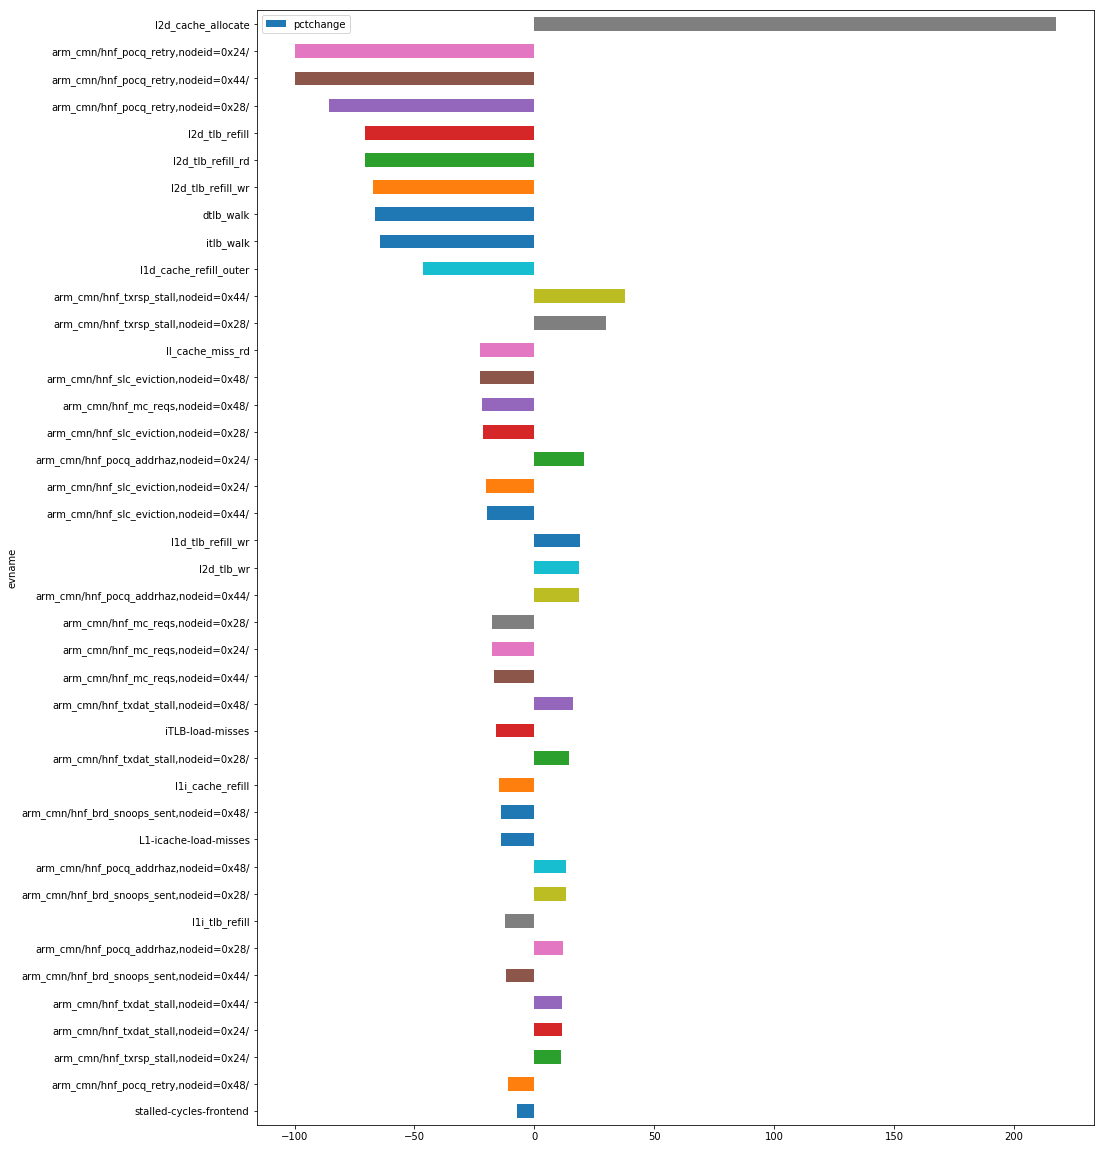

In [10]:
import matplotlib.pyplot as plt


df3.plot.barh(x='evname', y='pctchange', figsize=(15,len(df3)/2))


The data is loaded to a `DataFrame`, which is the structure that represent a complex table. We can easily access it, for example to get the first lines:

# Run function tracer with trace-cmd
<pre><code>
#!/bin/sh

trace-cmd reset
echo nop > /sys/kernel/debug/tracing/current_tracer
echo 0 > /sys/kernel/debug/tracing/function_profile_enabled
echo dequeue_task_fair enqueue_task_fair select_task_rq_fair> /sys/kernel/debug/tracing/set_ftrace_filter
echo 1 > /sys/kernel/debug/tracing/function_profile_enabled
trace-cmd stop

</code></pre>

# Get function trace result
<pre><code>
ftrace_get_function_stats() {
    for CPU in $(ls /sys/kernel/debug/tracing/trace_stat | sed 's/function//'); do
        REPLACE_STRING="s/  Function/\n  Function (CPU$CPU)/"
        cat /sys/kernel/debug/tracing/trace_stat/function$CPU \
            | sed "$REPLACE_STRING"
    done
}
</code></pre>

In [11]:
import re
import json

statfile = open('functions.stat1', 'r')
CPU_RE = re.compile(r'  Function \(CPU([0-9]+)\)')
STATS_RE = re.compile(r'([^ ]*) +([0-9]+) +([0-9.]+) us +([0-9.]+) us +([0-9.]+) us')

output = statfile.read()
logger = logging.getLogger('Trace')
logger.setLevel(logging.DEBUG)


In [12]:
function_stats = {}
outfile = 'test.json'

for line in output.splitlines():
    # Match a new CPU dataset
    match = CPU_RE.search(line)
    if match:
        cpu_id = int(match.group(1))
        function_stats[cpu_id] = {}
        logger.debug("Processing stats for CPU%d...", cpu_id)
        continue
    # Match a new function dataset
    match = STATS_RE.search(line)
    if match:
        fname = match.group(1)
        function_stats[cpu_id][fname] = {
                'hits' : int(match.group(2)),
                'time' : float(match.group(3)),
                'avg'  : float(match.group(4)),
                's_2'  : float(match.group(5)),
            }
        logger.debug(" %s: %s",
                     fname, function_stats[cpu_id][fname])

logger.warning("FTrace stats output [%s]...", outfile)
with open(outfile, 'w') as fh:
   json.dump(function_stats, fh, indent=4)
logger.info("FTrace function stats save in [%s]", outfile)


DEBUG:Trace:Processing stats for CPU0...
DEBUG:Trace: enqueue_task_fair: {'hits': 3430, 'time': 1244.1, 'avg': 0.362, 's_2': 0.067}
DEBUG:Trace: dequeue_task_fair: {'hits': 3232, 'time': 1115.52, 'avg': 0.345, 's_2': 0.148}
DEBUG:Trace: select_task_rq_fair: {'hits': 3077, 'time': 482.76, 'avg': 0.156, 's_2': 0.141}
DEBUG:Trace:Processing stats for CPU1...
DEBUG:Trace: enqueue_task_fair: {'hits': 505, 'time': 231.32, 'avg': 0.458, 's_2': 0.033}
DEBUG:Trace: dequeue_task_fair: {'hits': 561, 'time': 230.24, 'avg': 0.41, 's_2': 0.058}
DEBUG:Trace: select_task_rq_fair: {'hits': 361, 'time': 116.12, 'avg': 0.321, 's_2': 0.059}
DEBUG:Trace:Processing stats for CPU2...
DEBUG:Trace: enqueue_task_fair: {'hits': 844, 'time': 412.86, 'avg': 0.489, 's_2': 0.034}
DEBUG:Trace: dequeue_task_fair: {'hits': 838, 'time': 352.24, 'avg': 0.42, 's_2': 0.066}
DEBUG:Trace: select_task_rq_fair: {'hits': 586, 'time': 148.66, 'avg': 0.253, 's_2': 0.026}
DEBUG:Trace:Processing stats for CPU3...
DEBUG:Trace: enque

We can extract some columns from the table:

In [13]:
with open('test.json', 'r') as fh:
    trace_stats = json.load(fh)

frames = {}
for cpu, data in trace_stats.items():
    frames[int(cpu)] = pd.DataFrame.from_dict(data, orient='index')


In [14]:
stats_df = pd.concat(frames.values(), keys=frames.keys())

In [15]:
stats_df

hits     time    avg    s_2
0 dequeue_task_fair    3232  1115.52  0.345  0.148
  enqueue_task_fair    3430  1244.10  0.362  0.067
  select_task_rq_fair  3077   482.76  0.156  0.141
1 dequeue_task_fair     561   230.24  0.410  0.058
  enqueue_task_fair     505   231.32  0.458  0.033
  select_task_rq_fair   361   116.12  0.321  0.059
2 dequeue_task_fair     838   352.24  0.420  0.066
  enqueue_task_fair     844   412.86  0.489  0.034
  select_task_rq_fair   586   148.66  0.253  0.026
3 dequeue_task_fair     866   258.16  0.298  0.063
  enqueue_task_fair     718   281.32  0.391  0.044
  select_task_rq_fair   647   145.12  0.224  0.038

In [16]:
plot_data = stats_df['avg'].unstack()
plot_data

,dequeue_task_fair,enqueue_task_fair,select_task_rq_fair
0,0.345,0.362,0.156
1,0.410,0.458,0.321
2,0.420,0.489,0.253
3,0.298,0.391,0.224


In [17]:
%matplotlib inline

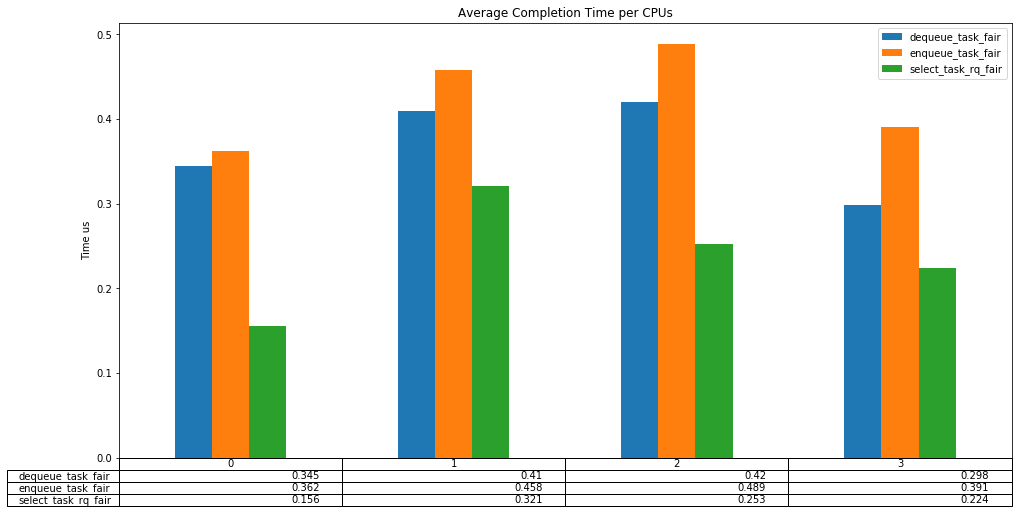

In [18]:
axes = plot_data.plot(kind='bar', figsize=(16, 8), legend=True, title="Average Completion Time per CPUs", table=True)
axes.set_ylabel("Time us")
axes.get_xaxis().set_visible(False)

In [19]:
df = pd.read_csv('rd_lat_format.csv', engine='python')
df

,size,ccix lat,size1,single lat
0,0.00049,1.539,0.00049,1.539
1,0.00098,1.539,0.00098,1.539
2,0.00195,1.539,0.00195,1.539
3,0.00293,1.539,0.00293,1.539
4,0.00391,1.539,0.00391,1.539
5,0.00586,1.539,0.00586,1.539
6,0.00781,1.539,0.00781,1.539
7,0.00977,1.539,0.00977,1.539
8,0.01172,1.539,0.01172,1.539
9,0.01367,1.539,0.01367,1.539


In [20]:
df.columns

Index(['size', 'ccix lat', 'size1', 'single lat'], dtype='object')

In [21]:
df_plot=df[['size', 'ccix lat','single lat']]

In [22]:
df['size']

0         0.00049
1         0.00098
2         0.00195
3         0.00293
4         0.00391
5         0.00586
6         0.00781
7         0.00977
8         0.01172
9         0.01367
10        0.01562
11        0.01758
12        0.01953
13        0.02148
14        0.02344
15        0.02539
16        0.02734
17        0.02930
18        0.03125
19        0.03516
20        0.03906
21        0.04297
22        0.04688
23        0.05078
24        0.05469
25        0.05859
26        0.06250
27        0.07031
28        0.07812
29        0.08594
          ...    
109      88.00000
110      96.00000
111     104.00000
112     112.00000
113     120.00000
114     128.00000
115     144.00000
116     160.00000
117     176.00000
118     192.00000
119     208.00000
120     224.00000
121     240.00000
122     256.00000
123     288.00000
124     320.00000
125     352.00000
126     384.00000
127     416.00000
128     448.00000
129     480.00000
130     512.00000
131     576.00000
132     640.00000
133     70

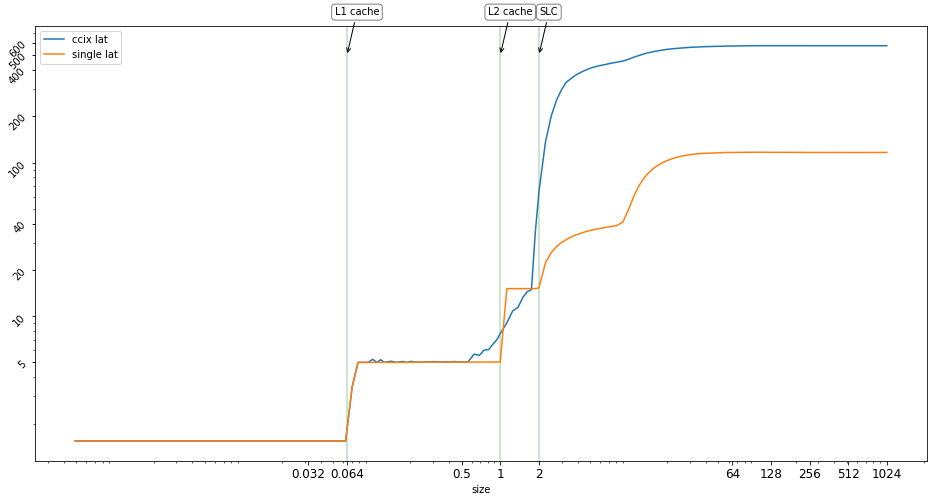

In [23]:
import matplotlib
from matplotlib.ticker import FormatStrFormatter, AutoLocator


cache_size=[0.032, 0.064, 0.5, 1, 2, 64, 128, 256, 512, 1024]
latency=[1,5,10,20,40,100, 200, 400, 500, 600]

fig, ax = plt.subplots(1,1, figsize=(16, 8))
ax.set_xscale("log")
ax.set_yscale("log")

#ax.xaxis.set_minor_locator(ticker.FixedLocator(cache_size))
ax.set_xticks(cache_size)
ax.set_yticks(latency)

ax.set_xticklabels(["%.3f" % y for y in cache_size], fontsize=12, rotation = 90)

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_xaxis().set_major_formatter(FormatStrFormatter('%g'))

ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.tick_params(axis ='x', labelrotation = 45) 
ax.tick_params(axis ='y', labelrotation = 45) 



ax.axvline(0.064, color='green', lw=2, alpha=0.2)
ax.axvline(1, color='green', lw=2, alpha=0.2)
ax.axvline(2, color='green', lw=2, alpha=0.2)

ax.annotate("L1 cache", xy=(0.064, 500),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, 40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
ax.annotate("L2 cache", xy=(1, 500),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, 40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
ax.annotate("SLC", xy=(2, 500),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, 40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

df_plot.plot(x='size', ax=ax)